# Real Estate Price Prediction using Linear Regression.

Submitted by Group 1:
* Daniel Sioldea 400178137
* Connor Ricotta 400199761
* Mina Nematian Doost 400423582



---



# Importing Libraries and Dataset:

In [66]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/")
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MyDrive


In [67]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import math
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn import preprocessing

warnings.filterwarnings('ignore')

# Importing Dataset
df = pd.read_csv('/content/drive/MyDrive/MECHENG 786 Project/data.csv')
#df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [68]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [69]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000




---



# Feature Extraction and Pre-Processing

Current Un-processed Feature List:


*   Price
*   Bedrooms
*   Bathrooms
*   Sq-footage living room
*   Sq-footage lot
*   Floors
*   Waterfront - bool
*   View
*   Condition
*   Sq-footage above
*   Sq-footage basement
*   Year built
*   Year renovated
*   Street
*   City
*   Zip code
*   Country

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [71]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426




---



# Removing rows with no price information - Saving as new DF (df_1):

Irrelevant to our calculation as there is no frame of reference without price


In [72]:
df_1 = df[df.price != 0]
df_1.isnull()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False




---

# Creating New Features:

Combining square footage features into new column with total square footage, and removing individual sqare footage columns.

In [73]:
# Combining all sqft features into one 'total' square footage feature
df_1['sqft_total'] = df_1[['sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_above']].sum(axis=1)
df_1['sqft_internal'] = df_1[['sqft_living', 'sqft_basement', 'sqft_above']].sum(axis=1)
df_1 = df_1.drop(['sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_above'], axis = 1)

df_1.head()

,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,yr_built,yr_renovated,street,city,statezip,country,sqft_total,sqft_internal
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1.5,0,0,3,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,10592,2680
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,2.0,0,4,5,1921,0,709 W Blaine St,Seattle,WA 98119,USA,16350,7300
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1.0,0,0,4,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,15807,3860
3,2014-05-02 00:00:00,420000.0,3.0,2.25,1.0,0,0,4,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,12030,4000
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1.0,0,0,4,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,14380,3880




---



# Check for missing or NaN values in dataset:

In [74]:
df_1.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
floors           0
waterfront       0
view             0
condition        0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
sqft_total       0
sqft_internal    0
dtype: int64



---



# Reformatting date feature to include individual columns for year and month:

In [75]:
# Converting date format into individual year and month columns

df_1['date'] = pd.to_datetime(df_1['date'])
df_1.insert(1, 'year', df_1.date.dt.year)
df_1.insert(2, 'month', df_1.date.dt.month)

In [76]:
df_1 = df_1.drop('date', axis = 1)

df_1.head()

,year,month,price,bedrooms,bathrooms,floors,waterfront,view,condition,yr_built,yr_renovated,street,city,statezip,country,sqft_total,sqft_internal
0,2014,5,313000.0,3.0,1.50,1.5,0,0,3,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,10592,2680
1,2014,5,2384000.0,5.0,2.50,2.0,0,4,5,1921,0,709 W Blaine St,Seattle,WA 98119,USA,16350,7300
2,2014,5,342000.0,3.0,2.00,1.0,0,0,4,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,15807,3860
3,2014,5,420000.0,3.0,2.25,1.0,0,0,4,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,12030,4000
4,2014,5,550000.0,4.0,2.50,1.0,0,0,4,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,14380,3880


In [77]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           4551 non-null   int64  
 1   month          4551 non-null   int64  
 2   price          4551 non-null   float64
 3   bedrooms       4551 non-null   float64
 4   bathrooms      4551 non-null   float64
 5   floors         4551 non-null   float64
 6   waterfront     4551 non-null   int64  
 7   view           4551 non-null   int64  
 8   condition      4551 non-null   int64  
 9   yr_built       4551 non-null   int64  
 10  yr_renovated   4551 non-null   int64  
 11  street         4551 non-null   object 
 12  city           4551 non-null   object 
 13  statezip       4551 non-null   object 
 14  country        4551 non-null   object 
 15  sqft_total     4551 non-null   int64  
 16  sqft_internal  4551 non-null   int64  
dtypes: float64(4), int64(9), object(4)
memory usage: 640



---



## **Data preprocessing**

In [78]:
df_1.corr()

,year,month,price,bedrooms,bathrooms,floors,waterfront,view,condition,yr_built,yr_renovated,sqft_total,sqft_internal
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,0.040502,0.014240,0.029075,0.035737,0.000997,-0.014630,0.019167,0.009468,-0.023559,-0.020594,0.033237
price,NaN,0.040502,1.000000,0.210228,0.341126,0.152758,0.150083,0.242587,0.038892,0.021757,-0.029034,0.074092,0.445494
bedrooms,NaN,0.014240,0.210228,1.000000,0.547612,0.176219,-0.005521,0.115080,0.023018,0.141498,-0.062219,0.101538,0.596053
bathrooms,NaN,0.029075,0.341126,0.547612,1.000000,0.489548,0.063310,0.205536,-0.120765,0.464239,-0.218160,0.147714,0.757213
floors,NaN,0.035737,0.152758,0.176219,0.489548,1.000000,0.015804,0.031980,-0.273786,0.466691,-0.235969,0.022225,0.343513
waterfront,NaN,0.000997,0.150083,-0.005521,0.063310,0.015804,1.000000,0.347572,0.006112,-0.032017,0.015821,0.022847,0.107758
view,NaN,-0.014630,0.242587,0.115080,0.205536,0.031980,0.347572,1.000000,0.062560,-0.066344,0.025846,0.087859,0.309343
condition,NaN,0.019167,0.038892,0.023018,-0.120765,-0.273786,0.006112,0.062560,1.000000,-0.398886,-0.184483,-0.002365,-0.062529
yr_built,NaN,0.009468,0.021757,0.141498,0.464239,0.466691,-0.032017,-0.066344,-0.398886,1.000000,-0.322938,0.063496,0.284733


# Converting float values to int values:

In [79]:
df_1 = df_1.astype({'price':'int', 'bedrooms':'int', 'bathrooms':'int', 'floors':'int'})
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4551 non-null   int64 
 1   month          4551 non-null   int64 
 2   price          4551 non-null   int64 
 3   bedrooms       4551 non-null   int64 
 4   bathrooms      4551 non-null   int64 
 5   floors         4551 non-null   int64 
 6   waterfront     4551 non-null   int64 
 7   view           4551 non-null   int64 
 8   condition      4551 non-null   int64 
 9   yr_built       4551 non-null   int64 
 10  yr_renovated   4551 non-null   int64 
 11  street         4551 non-null   object
 12  city           4551 non-null   object
 13  statezip       4551 non-null   object
 14  country        4551 non-null   object
 15  sqft_total     4551 non-null   int64 
 16  sqft_internal  4551 non-null   int64 
dtypes: int64(13), object(4)
memory usage: 640.0+ KB


Text(0.5, 1.0, 'Total Property Size Boxplots per City')

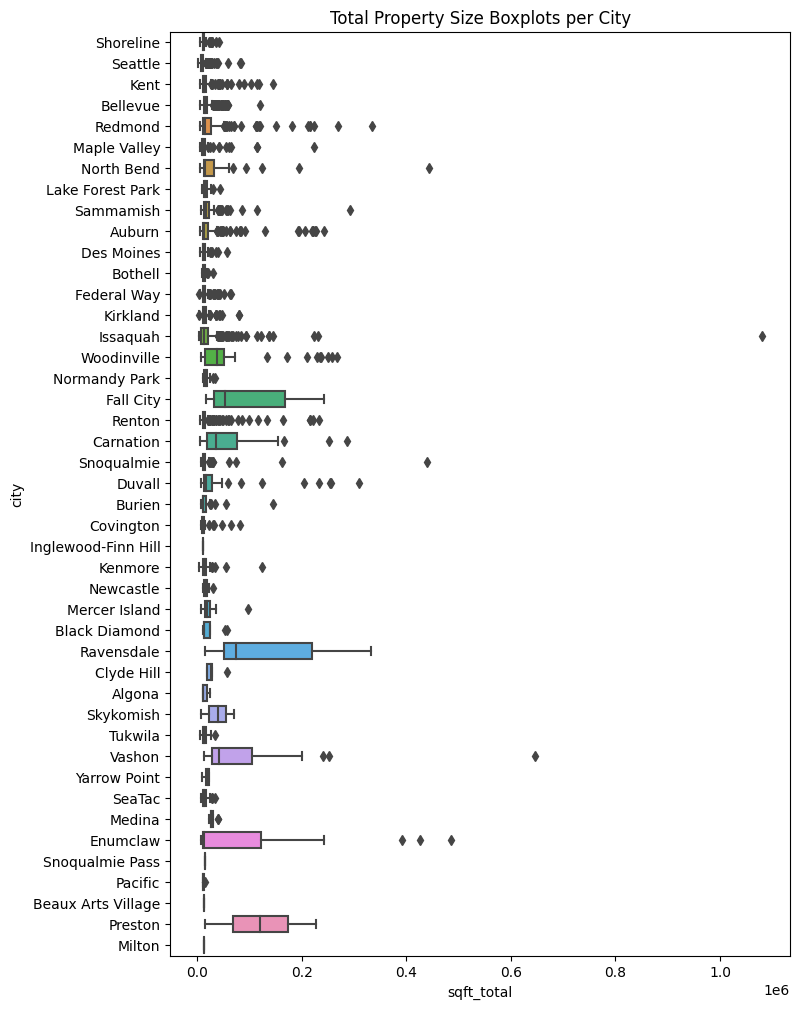

In [80]:
plt.figure(figsize=(8,12))
sns.boxplot(x='sqft_total',y='city',data=df_1,orient='h')
plt.title('Total Property Size Boxplots per City')

In [81]:
df_1 = df_1.drop(df_1[df_1['sqft_total']>600000].index)



---



# Function to see square footage spread for specific city:

In [82]:
def city_sqft(city):
  city_choice = df_1[df_1['city']==str(city)]['sqft_total']
  plt.figure(figsize=(10,3))
  sns.boxplot(x=city_choice, data=df_1,orient='h')
  plt.title('Total Property Size Boxplot for' f"\n{str(city)}")
  plt.show()


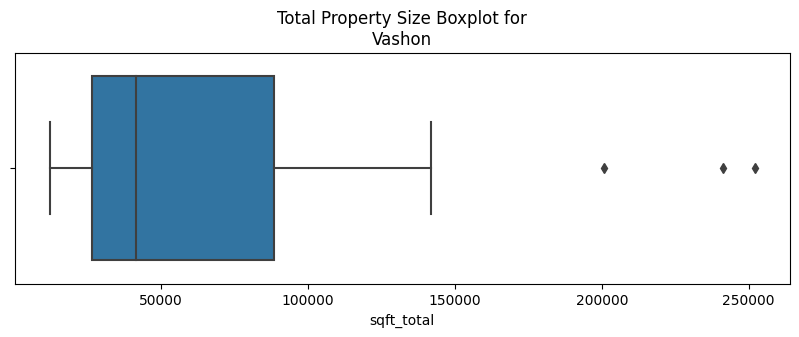

In [83]:
city_sqft('Vashon')



---



# Converting only State variable to numerical dummy variables - Saving as new DF (df_2):

To reduce number of columns, postal code specific properties are irrelevant in this project.

In [84]:
df_2 = pd.get_dummies(df_1, columns=['city'], prefix = ['city'])
df_2 = df_2.drop(['street', 'statezip', 'country'], axis = 1)

In [85]:
df_2.head(10)

,year,month,price,bedrooms,bathrooms,floors,waterfront,view,condition,yr_built,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,2014,5,313000,3,1,1,0,0,3,1955,...,0,0,1,0,0,0,0,0,0,0
1,2014,5,2384000,5,2,2,0,4,5,1921,...,0,1,0,0,0,0,0,0,0,0
2,2014,5,342000,3,2,1,0,0,4,1966,...,0,0,0,0,0,0,0,0,0,0
3,2014,5,420000,3,2,1,0,0,4,1963,...,0,0,0,0,0,0,0,0,0,0
4,2014,5,550000,4,2,1,0,0,4,1976,...,0,0,0,0,0,0,0,0,0,0
5,2014,5,490000,2,1,1,0,0,3,1938,...,0,1,0,0,0,0,0,0,0,0
6,2014,5,335000,2,2,1,0,0,3,1976,...,0,0,0,0,0,0,0,0,0,0
7,2014,5,482000,4,2,2,0,0,3,1989,...,0,0,0,0,0,0,0,0,0,0
8,2014,5,452500,3,2,1,0,0,4,1985,...,0,0,0,0,0,0,0,0,0,0
9,2014,5,640000,4,2,1,0,0,3,1945,...,0,1,0,0,0,0,0,0,0,0


In [86]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4549 entries, 0 to 4599
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   year                      4549 non-null   int64
 1   month                     4549 non-null   int64
 2   price                     4549 non-null   int64
 3   bedrooms                  4549 non-null   int64
 4   bathrooms                 4549 non-null   int64
 5   floors                    4549 non-null   int64
 6   waterfront                4549 non-null   int64
 7   view                      4549 non-null   int64
 8   condition                 4549 non-null   int64
 9   yr_built                  4549 non-null   int64
 10  yr_renovated              4549 non-null   int64
 11  sqft_total                4549 non-null   int64
 12  sqft_internal             4549 non-null   int64
 13  city_Algona               4549 non-null   uint8
 14  city_Auburn               4549 non-null 



---



# Checking for outliers in price data:

<Axes: title={'center': 'Spread of Price'}, ylabel='price'>

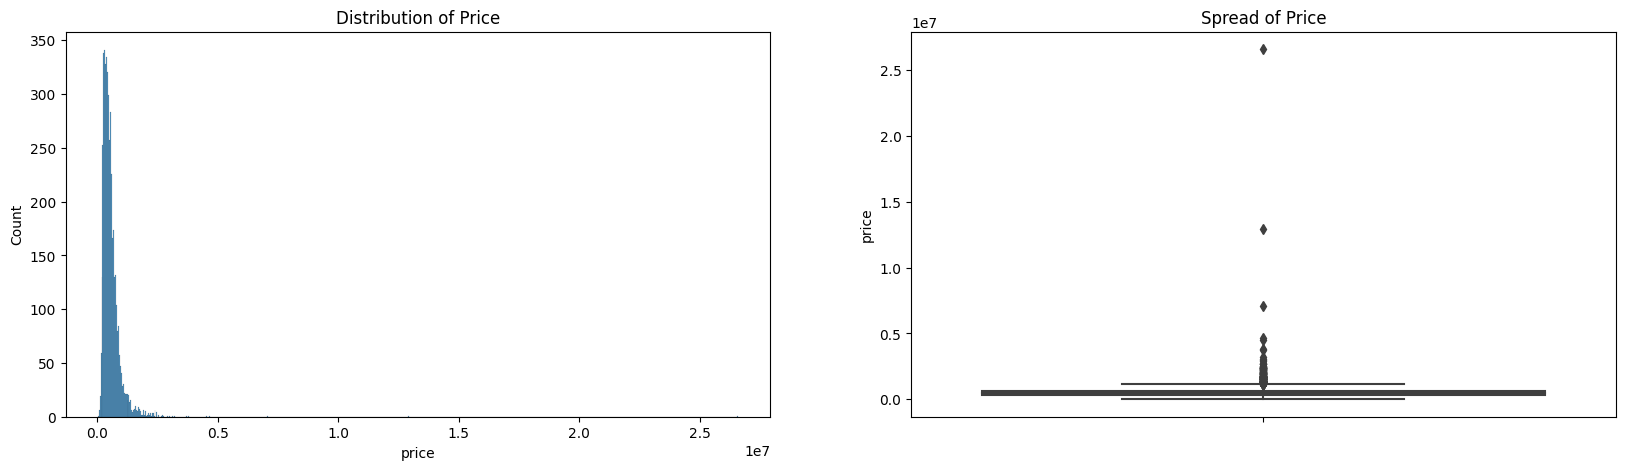

In [87]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Distribution of Price')
sns.histplot(df_2['price'])

plt.subplot(1,2,2)
plt.title('Spread of Price')
sns.boxplot(y=df_2['price'])



Observing Trends Before Removing Outliers



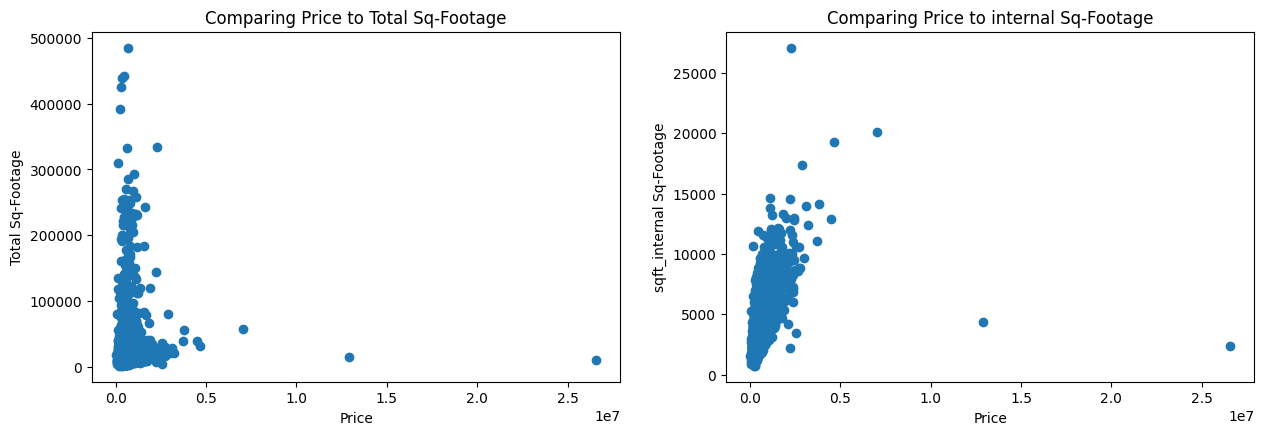

In [88]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('Comparing Price to Total Sq-Footage')
plt.xlabel('Price')
plt.ylabel('Total Sq-Footage')
plt.scatter(x=df_2['price'], y=df_2['sqft_total'])

plt.subplot(2,2,2)
plt.title('Comparing Price to internal Sq-Footage')
plt.xlabel('Price')
plt.ylabel('sqft_internal Sq-Footage')
plt.scatter(x=df_2['price'], y=df_2['sqft_internal'])



---



# Removing rows where real estate price was higher than $3,500,000:

Majority of the data falls under this price range.

In [89]:
df_2[df_2['price']>3500000]

,year,month,price,bedrooms,bathrooms,floors,waterfront,view,condition,yr_built,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
1637,2014,5,3710000,4,3,2,0,2,4,2000,...,0,0,0,0,0,0,0,0,0,0
2286,2014,6,7062500,5,4,2,1,2,3,1940,...,0,0,0,0,0,0,0,0,0,0
2654,2014,6,4668000,5,6,1,1,4,3,1983,...,0,0,0,0,0,0,0,0,0,0
2761,2014,6,4489000,4,3,2,0,0,3,2001,...,0,0,0,0,0,0,0,0,0,0
3729,2014,7,3800000,5,5,1,0,2,4,1978,...,0,0,0,0,0,0,0,0,0,0
4346,2014,6,12899000,3,2,1,0,0,3,1956,...,0,1,0,0,0,0,0,0,0,0
4350,2014,7,26590000,3,2,1,0,0,4,1992,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df_2 = df_2.drop(df_2[df_2['price']>3500000].index)

<Axes: title={'center': 'Spread of Price'}, ylabel='price'>

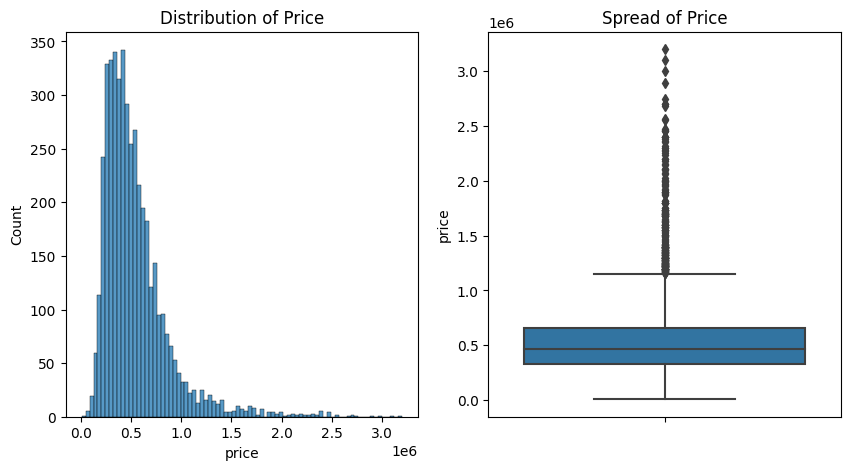

In [91]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Distribution of Price')
sns.histplot(df_2['price'])

plt.subplot(1,2,2)
plt.title('Spread of Price')
sns.boxplot(y=df_2['price'])



---



# Observing trends with property size:

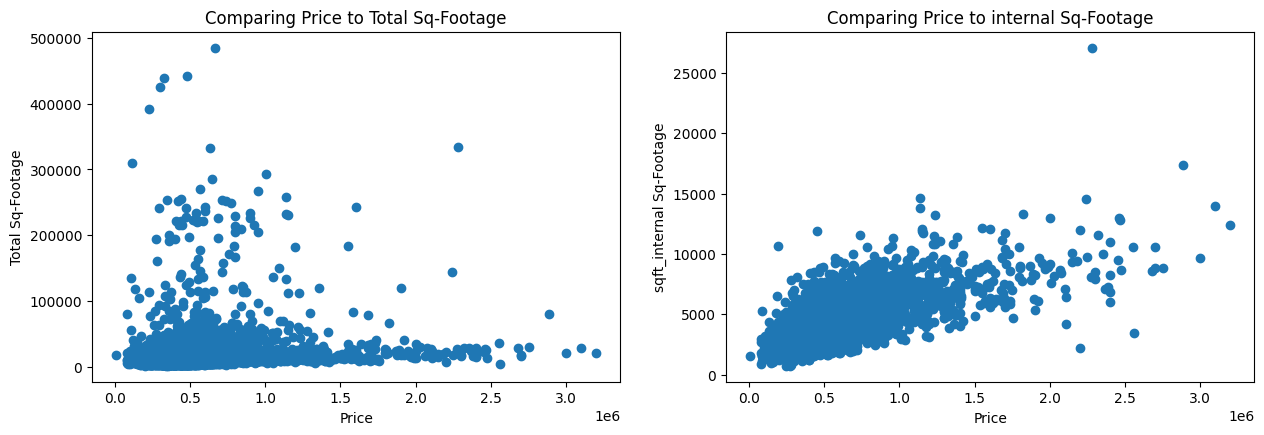

In [92]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('Comparing Price to Total Sq-Footage')
plt.xlabel('Price')
plt.ylabel('Total Sq-Footage')
plt.scatter(x=df_2['price'], y=df_2['sqft_total'])

plt.subplot(2,2,2)
plt.title('Comparing Price to internal Sq-Footage')
plt.xlabel('Price')
plt.ylabel('sqft_internal Sq-Footage')
plt.scatter(x=df_2['price'], y=df_2['sqft_internal'])



---



# Observing trends in other features:

In [93]:
def intplot(feature):
  plt.figure(figsize=(10,5))

  plt.subplot(1,2,1)
  plt.title(f"\n{str(feature)} box plot")
  plt.xlabel(f"\n{str(feature)}")
  sns.boxplot(df_2[feature])

  plt.subplot(1,2,2)
  plt.title(f"\n{str(feature)} price scatter plot")
  plt.xlabel(f"\n{str(feature)}")
  plt.ylabel('Price')
  sns.scatterplot(x = df_2[feature], y = df_2['price'])

  plt.show()


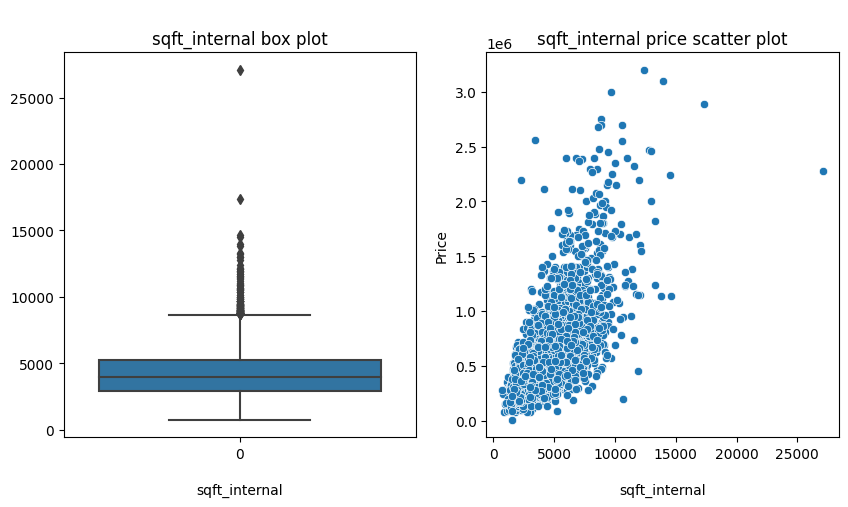

In [94]:
intplot('sqft_internal')

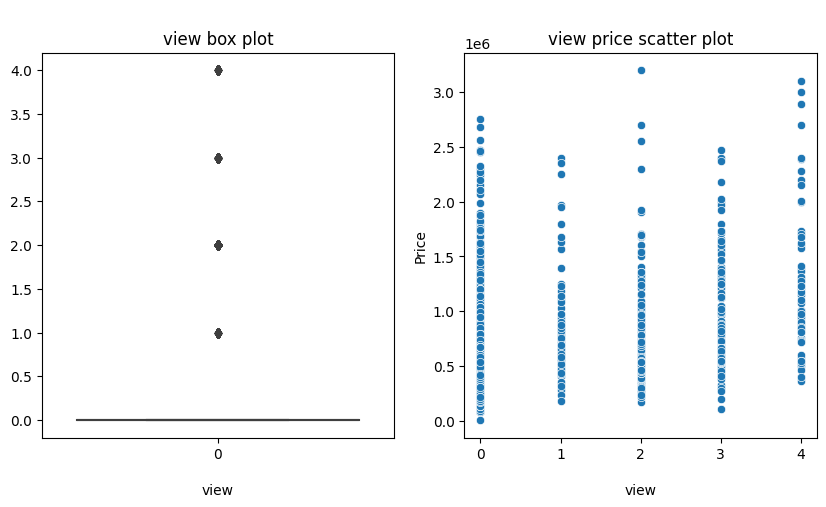

In [95]:
intplot('view')

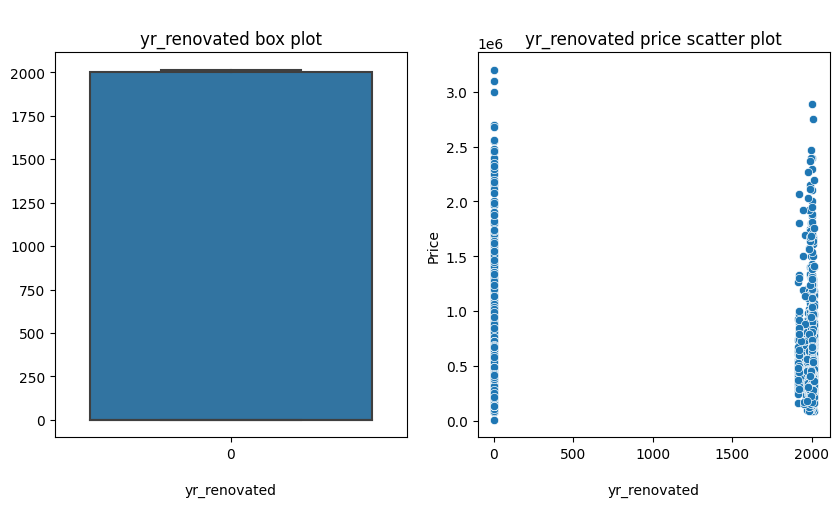

In [96]:
intplot('yr_renovated')

No visible relationship between 'yr_renovated' feature and pice.

In [97]:
df_2 = df_2.drop(['yr_renovated'], axis = 1)
#df_2 = df_2.drop(['yr_built'], axis = 1)
#df_2 = df_2.drop(['sqft_total'], axis = 1)
df_2 = df_2.drop(['condition'], axis = 1)
df_2.head()

,year,month,price,bedrooms,bathrooms,floors,waterfront,view,yr_built,sqft_total,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,2014,5,313000,3,1,1,0,0,1955,10592,...,0,0,1,0,0,0,0,0,0,0
1,2014,5,2384000,5,2,2,0,4,1921,16350,...,0,1,0,0,0,0,0,0,0,0
2,2014,5,342000,3,2,1,0,0,1966,15807,...,0,0,0,0,0,0,0,0,0,0
3,2014,5,420000,3,2,1,0,0,1963,12030,...,0,0,0,0,0,0,0,0,0,0
4,2014,5,550000,4,2,1,0,0,1976,14380,...,0,0,0,0,0,0,0,0,0,0


---




# Normalizing Data - Saving as new DF (norm_df):


In [98]:
scaledata = preprocessing.MinMaxScaler(feature_range = (0,1))
norm_df = pd.DataFrame(scaledata.fit_transform(df_2), columns = df_2.columns)

norm_df.head()

,year,month,price,bedrooms,bathrooms,floors,waterfront,view,yr_built,sqft_total,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,0.0,0.0,0.095608,0.333333,0.125,0.0,0.0,0.0,0.482456,0.017765,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.744377,0.555556,0.250,0.5,0.0,1.0,0.184211,0.029688,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.104693,0.333333,0.250,0.0,0.0,0.0,0.578947,0.028564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.129127,0.333333,0.250,0.0,0.0,0.0,0.552632,0.020743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.169852,0.444444,0.250,0.0,0.0,0.0,0.666667,0.025609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Create X and Y variables for our model

In [99]:
X = norm_df.drop('price',axis=1)
y = norm_df['price']

# Create Train Test Split

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Scale Data and crete model (pick a better alpha at some point)

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import Ridge


# Grid Search / Cross Validation:

Test varying hyper parameters (next lttle bit is messy will clean up)

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

base_elastic_model = ElasticNet()

# Grid Search Hyper-parameters

param_grid = {
    'alpha': [0.1, 1, 5, 10, 50, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
}

ridge_param = {
    'alpha': [0.1, 1, 5, 10, 50, 100],
}

#establish grid models

grid_model_elastic = GridSearchCV(
    estimator=base_elastic_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2
)

grid_model_Ridge = GridSearchCV(
    estimator=Ridge(),
    param_grid=ridge_param,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2
)

grid_model = GridSearchCV(
    estimator=[('ridge',Ridge()),('Lasso',Lasso())],
    param_grid=[ridge_param,param_grid],
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2
)


# Cross Validation

In [103]:
from sklearn.model_selection import cross_validate

#choosing to use multiple scoring metrics
model= grid_model_Ridge
scores = cross_validate( model,X_train,y_train,scoring=['neg_mean_absolute_error','neg_mean_squared_error','max_error'],cv=5)

pd.DataFrame(scores)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=5; total time=   0.0s
[CV] END ........................................

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_max_error
0,0.093945,0.000906,-0.035535,-0.003095,-0.455759
1,0.109086,0.000925,-0.036607,-0.003425,-0.580896
2,0.103370,0.000910,-0.038405,-0.004285,-0.642354
3,0.120952,0.005193,-0.039330,-0.004284,-0.536182
4,0.093488,0.000930,-0.036918,-0.003320,-0.392991


In [104]:
pd.DataFrame(scores).mean()

fit_time                        0.104168
score_time                      0.001773
test_neg_mean_absolute_error   -0.037359
test_neg_mean_squared_error    -0.003682
test_max_error                 -0.521636
dtype: float64

# Evaluate Model

In [105]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(y_test,y_pred)




Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=5; total time=   0.0s
[CV] END ........................................

0.0036546252295827962

In [106]:
grid_model_Ridge.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=5; total time=   0.0s
[CV] END ........................................

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [107]:
grid_model_elastic.fit(X_train,y_train)


Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [108]:
grid_model_elastic.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [109]:
grid_model_Ridge.best_params_

{'alpha': 50}

In [110]:
yPredElas = grid_model_elastic.predict(X_test)


In [111]:
yPredRidge = grid_model_Ridge.predict(X_test)

# Performance Metrics:

Error Calculations:

In [112]:
MAEElas = mean_absolute_error(y_test, yPredElas)
MAEElas

0.047042119876452876

In [113]:
MSEElas = mean_squared_error(y_test, yPredElas)
MSEElas

0.0049928310700558184

In [114]:
rmseElas = np.sqrt(mean_squared_error(y_test, yPredElas))
rmseElas

0.07065996794547687

In [115]:
MAERidge = mean_absolute_error(y_test, yPredRidge)
MAERidge

0.03755437452702796

In [116]:
MSERidge = mean_squared_error(y_test, yPredRidge)
MSERidge

0.0036546252295827962

In [117]:
RMSERidge = np.sqrt(MSERidge)
RMSERidge

0.06045349642148745

In [118]:
print('Ridge Metrics:')
print('MAE:', MAERidge)
print('MSE:', MSERidge)
print('RMSE:', RMSERidge)
print(' ')
print('Elastic Metrics:')
print('MAE:', MAEElas)
print('MSE:', MSEElas)
print('RMSE:', rmseElas)

Ridge Metrics:
MAE: 0.03755437452702796
MSE: 0.0036546252295827962
RMSE: 0.06045349642148745
 
Elastic Metrics:
MAE: 0.047042119876452876
MSE: 0.0049928310700558184
RMSE: 0.07065996794547687


ridge better because we have already removed useless features during feature engineering



---


# Quartet:

# Calculate Residual and plot graphs (ridge)




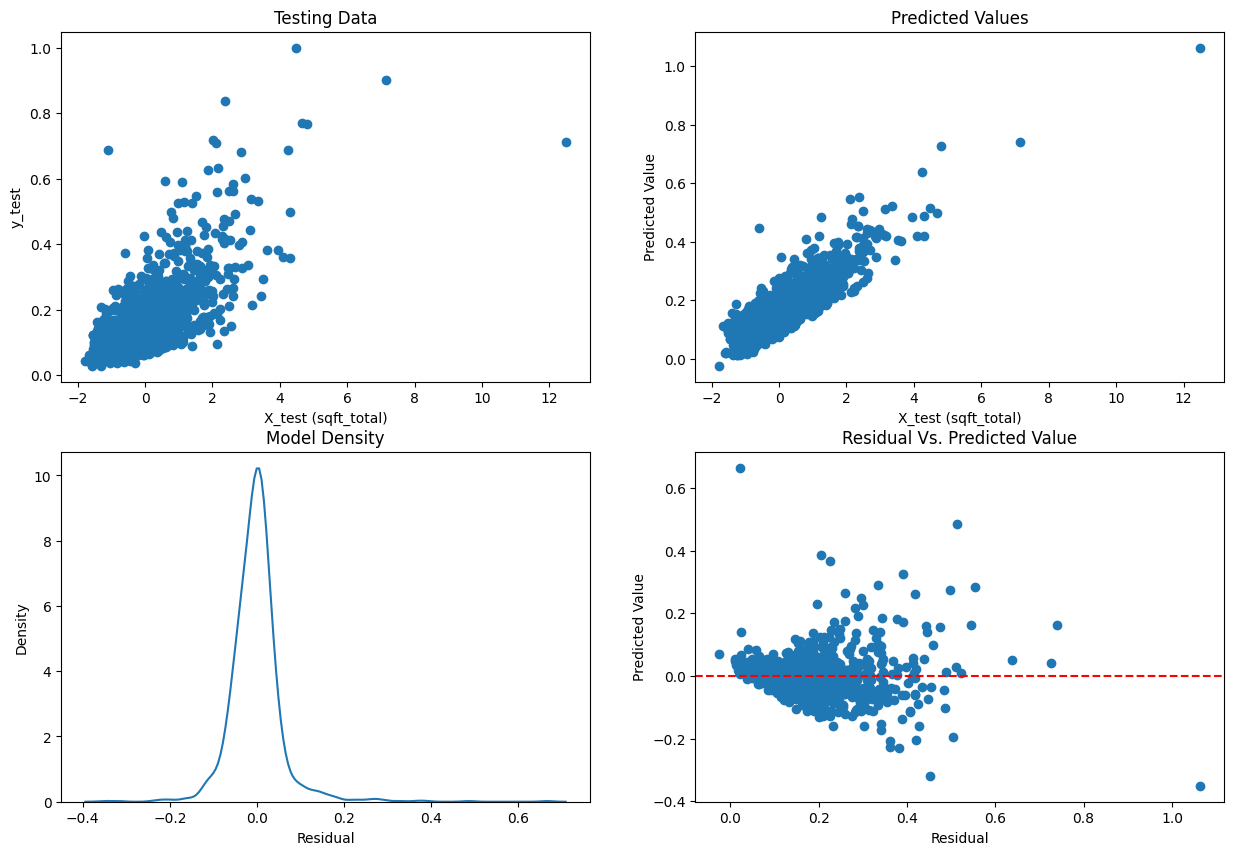

In [119]:
ElasticResidual = y_test - yPredRidge

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('Testing Data')
plt.xlabel('X_test (sqft_total)')
plt.ylabel('y_test')
plt.scatter(X_test[:, 9], y_test)

plt.subplot(2,2,2)
plt.title('Predicted Values')
plt.xlabel('X_test (sqft_total)')
plt.ylabel('Predicted Value')
plt.scatter(X_test[:, 9], yPredRidge)

plt.subplot(2,2,3)
plt.title('Model Density')
plt.xlabel('Residual')
sns.kdeplot(ElasticResidual)

plt.subplot(2,2,4)
plt.title('Residual Vs. Predicted Value')
plt.xlabel('Residual')
plt.ylabel('Predicted Value')
plt.scatter(x=yPredRidge, y=ElasticResidual)
plt.axhline(y=0, color='r', linestyle='--')


# Calculate Residual and plot graphs (Elastic)

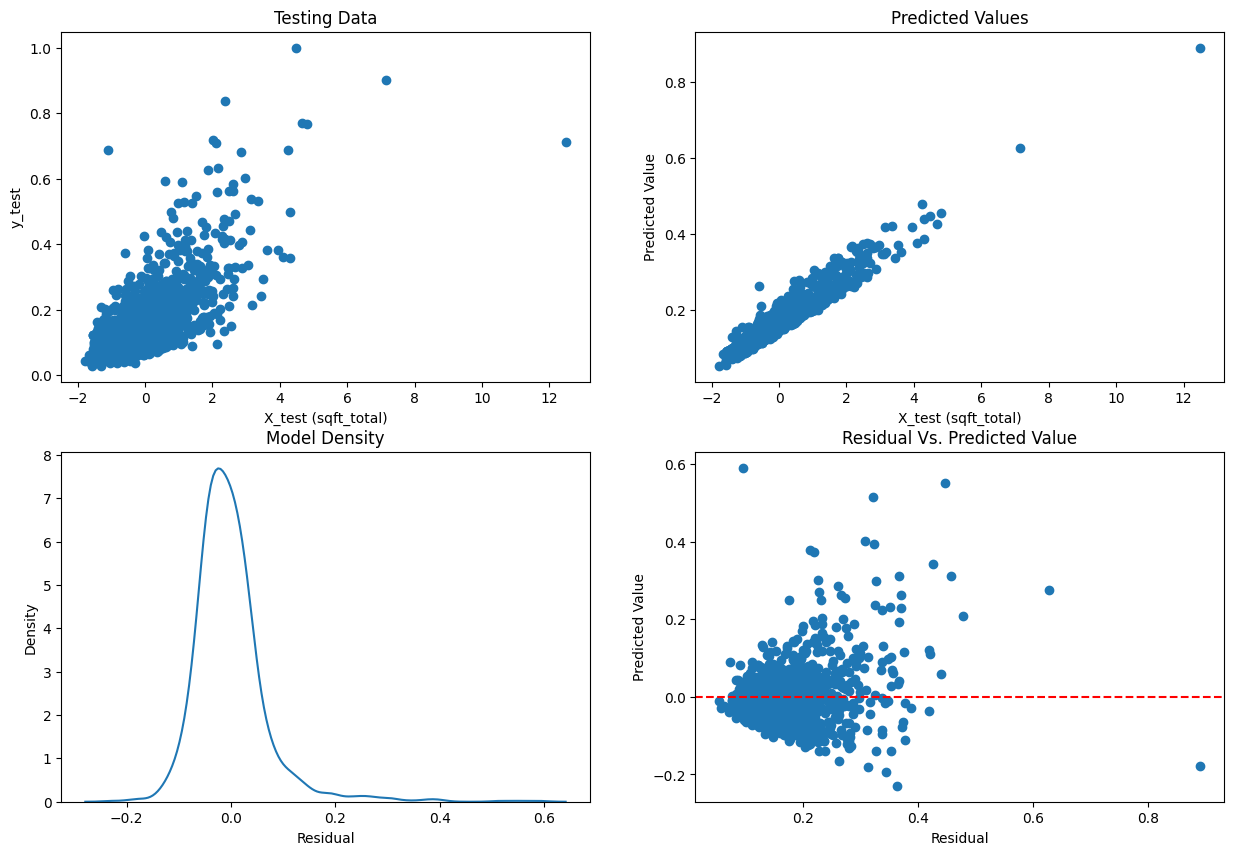

In [120]:
ElasticResidual = y_test - yPredElas

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('Testing Data')
plt.xlabel('X_test (sqft_total)')
plt.ylabel('y_test')
plt.scatter(X_test[:, 9], y_test)

plt.subplot(2,2,2)
plt.title('Predicted Values')
plt.xlabel('X_test (sqft_total)')
plt.ylabel('Predicted Value')
plt.scatter(X_test[:, 9], yPredElas)

plt.subplot(2,2,3)
plt.title('Model Density')
plt.xlabel('Residual')
sns.kdeplot(ElasticResidual)

plt.subplot(2,2,4)
plt.title('Residual Vs. Predicted Value')
plt.xlabel('Residual')
plt.ylabel('Predicted Value')
plt.scatter(x=yPredElas, y=ElasticResidual)
plt.axhline(y=0, color='r', linestyle='--')

In [121]:
norm_df.corr()

,year,month,price,bedrooms,bathrooms,floors,waterfront,view,yr_built,sqft_total,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,0.029017,0.014167,0.013847,0.038567,-0.000900,-0.015517,0.008974,-0.017565,...,-0.017347,-0.019108,-0.008350,0.009101,-0.006024,-0.016439,0.008176,0.007324,-0.013149,-0.000339
price,NaN,0.029017,1.000000,0.343033,0.505127,0.246601,0.173729,0.381912,0.026235,0.132706,...,-0.067606,0.067513,-0.061275,-0.023666,0.002590,-0.000867,-0.055973,-0.019930,0.033221,0.056982
bedrooms,NaN,0.014167,0.343033,1.000000,0.498235,0.155800,-0.015612,0.111721,0.142466,0.109878,...,-0.015612,-0.179946,-0.015598,-0.020674,0.019623,-0.006460,-0.028780,-0.052960,0.026705,0.011713
bathrooms,NaN,0.013847,0.505127,0.498235,1.000000,0.471203,0.034859,0.188538,0.397191,0.155124,...,-0.037410,-0.128867,-0.064049,-0.027111,0.056451,0.004418,-0.039679,-0.029803,0.040158,-0.001198
floors,NaN,0.038567,0.246601,0.155800,0.471203,1.000000,0.010899,0.023045,0.561564,0.016443,...,-0.050205,-0.037316,-0.092055,-0.005861,0.088992,0.014526,-0.016607,-0.009469,0.019475,0.029062
waterfront,NaN,-0.000900,0.173729,-0.015612,0.034859,0.010899,1.000000,0.341092,-0.031380,0.023739,...,-0.006203,-0.033271,-0.013140,-0.002025,-0.009782,-0.001169,-0.006313,0.245348,-0.012637,-0.002338
view,NaN,-0.015517,0.381912,0.111721,0.188538,0.023045,0.341092,1.000000,-0.067194,0.103678,...,-0.005615,0.056309,-0.001158,-0.007853,0.009270,-0.004533,-0.017236,0.108725,-0.043473,0.010397
yr_built,NaN,0.008974,0.026235,0.142466,0.397191,0.561564,-0.031380,-0.067194,1.000000,0.080491,...,-0.016071,-0.446521,-0.061789,-0.006439,0.119894,0.013566,-0.038711,-0.017772,0.064409,-0.005025
sqft_total,NaN,-0.017565,0.132706,0.109878,0.155124,0.016443,0.023739,0.103678,0.080491,1.000000,...,-0.009423,-0.223411,-0.032028,0.016357,0.018175,-0.001949,-0.009653,0.122200,0.147108,-0.000362


**Histogram Graphs of Independent Variables:**

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'sqft_total'}>,
        <Axes: title={'center': 'sqft_internal'}>,
        <Axes: title={'center': 'city_Algona'}>,
        <Axes: title={'center': 'city_Auburn'}>,
        <Axes: title={'center': 'city_Beaux Arts Village'}>],
       [<Axes: title={'center': 'city_Bellevue'}>,
        <Axes: title={'center': 'city_Black Diamond'}>,
        <Axes: title={'center': 'city_Bothell'}>,
        <Axes: title={'center': 'city_Burien'}>,
        <Axes: title={'center': 'city_Carnation'}>,
        <Axes: title={'center': 'city_Clyde Hill'}>,
        <Axes: title={'cente

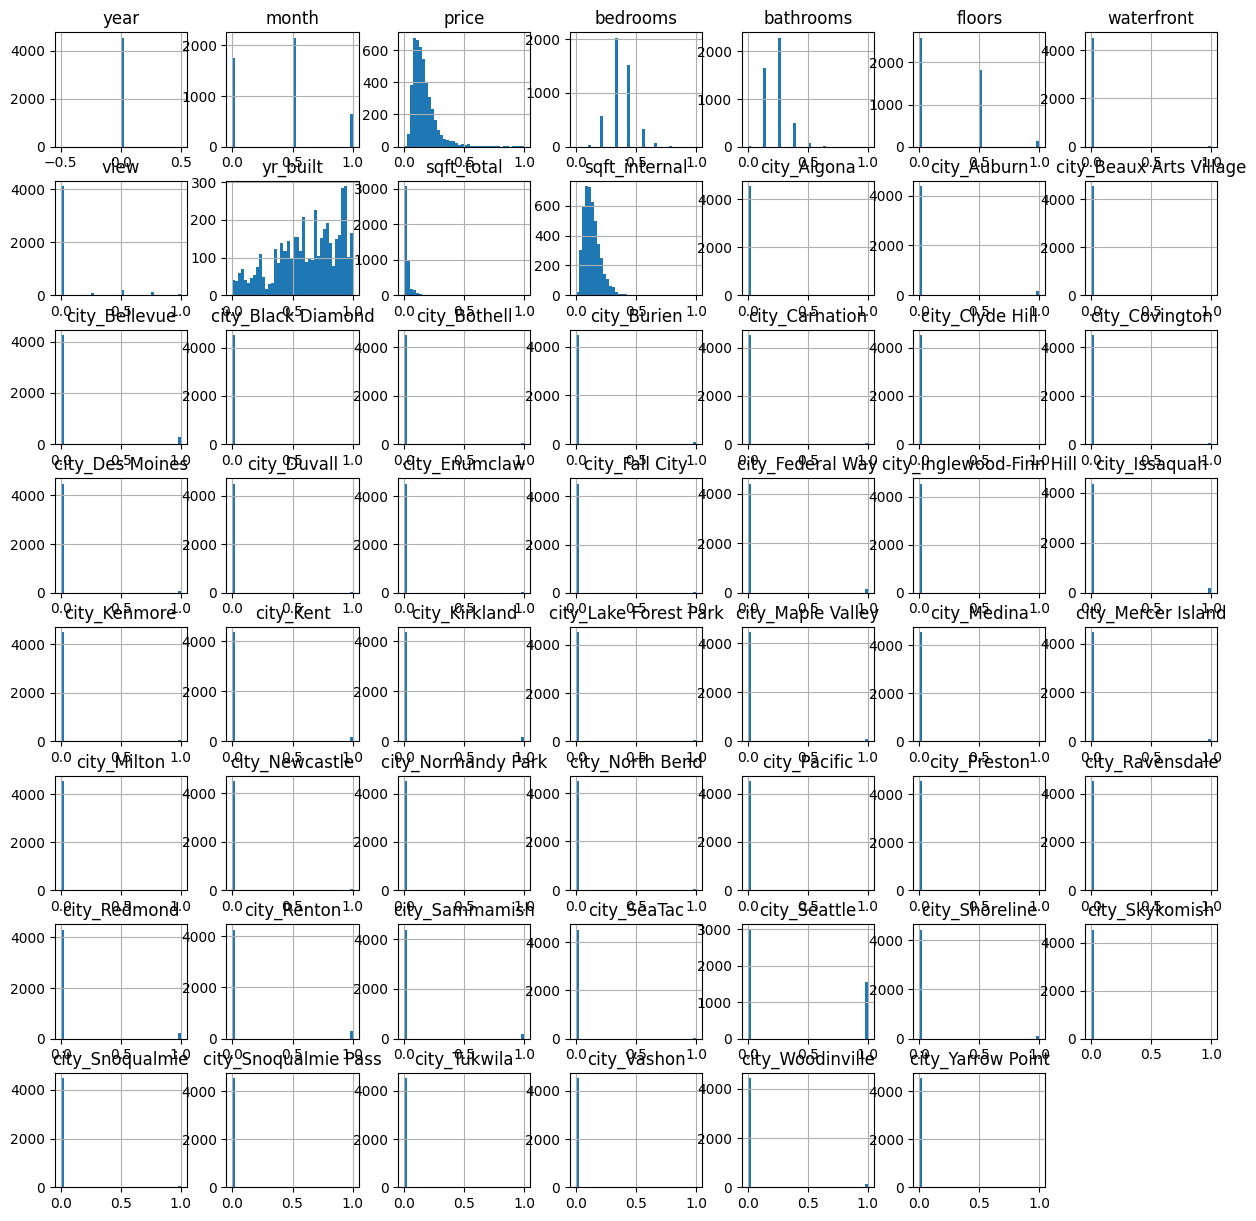

In [122]:
norm_df.hist(bins=40, figsize=(15,15))


# Cost Function and Gradient Regression Prediction:

Cost function
Use: To measure how well a  (w,b)
  pair fits the training data
Goal: Find the best  (w,b)
  pair to minimize  J(w,b)
  as small as possible
Squared error cost function

In [123]:
def compute_cost(X, y, w, b):
    """
    Compute cost
    Args:
      X (ndarray (m,n)): data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
# Cost function
def compute_cost(x, y, w, b):
    m = x.shape[0]
    total_cost = 0

    for i in range(m):
        f_wb_i = np.dot(w, x[i]) + b
        total_cost += (f_wb_i - y.iloc[i]) ** 2
    total_cost /= (2 * m)

    return total_cost

In [124]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): the gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : the gradient of the cost w.r.t. the parameter b.
    """
    m, n = X.shape         #number of examples, features
    dJ_dw = np.zeros((n,))
    dJ_db = 0.0

    for i in range(m):
        f_wb_i = np.dot(w, X[i]) + b
        dJ_dw[:n] += (f_wb_i - y.iloc[i]) * X[i, :n]
        dJ_db     += (f_wb_i - y.iloc[i])
    dJ_dw /= m
    dJ_db /= m

    return dJ_dw, dJ_db

In [125]:
import math, copy

def gradient_descent(x, y, w_in, b_in, lr, iter):
    J_his = []
    w = copy.deepcopy(w_in) #avoid modifying global w within function
    b = b_in

    for i in range(iter):
        dJ_dw, dJ_db = compute_gradient(x, y, w, b)
        w -= lr * dJ_dw
        b -= lr * dJ_db

        # save cost J at each iteration
        if i < 100000: # prevent resource exhaustion
            J_his.append(compute_cost(x, y, w, b))

        # print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(iter/10) == 0:
            print(f"Iteration {i:4}: Cost {float(J_his[-1]):8.2f}")

    # Plot the cost function J over iterations
    plt.plot(range(len(J_his)), J_his)
    plt.xlabel('Iteration')
    plt.ylabel('Cost Function J')
    plt.title('Cost Function J vs. Iteration')
    plt.grid(True)
    plt.show()

    return w, b, J_his

In [126]:
# initialize parameters
initial_w = np.zeros(X_train.shape[1])
initial_b = 0.0

# gradient descent settings
iter = 1000
lr = 0.01

Iteration    0: Cost     0.02
Iteration  100: Cost     0.00
Iteration  200: Cost     0.00
Iteration  300: Cost     0.00
Iteration  400: Cost     0.00
Iteration  500: Cost     0.00
Iteration  600: Cost     0.00
Iteration  700: Cost     0.00
Iteration  800: Cost     0.00
Iteration  900: Cost     0.00


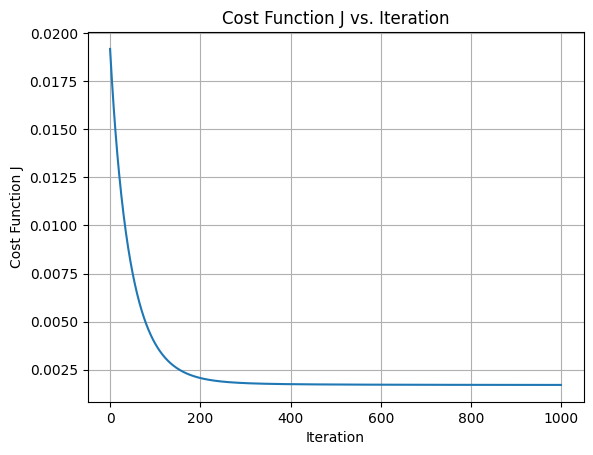

w, b found by gradient descent: [ 0.00000000e+00  1.54525044e-03 -8.45663649e-03  9.18403620e-03
  7.82337063e-03  1.07976513e-02  1.52181241e-02 -1.16463196e-02
  1.34314216e-04  5.96578079e-02 -1.09245836e-03 -1.08896988e-02
  2.08419504e-03  1.53245179e-02  3.46240200e-04 -2.27088858e-03
 -4.61841998e-03 -2.39468936e-03  9.08325258e-03 -5.09494890e-03
 -6.89570550e-03 -3.52204284e-03 -4.68703036e-03  2.72512335e-05
 -1.15695178e-02  0.00000000e+00  6.55500008e-04 -1.71355552e-03
 -1.05568397e-02  6.91393342e-03 -1.78821199e-03 -6.83635954e-03
  1.09557832e-02  1.42507469e-02  6.59066428e-05  1.21778795e-03
 -1.02241383e-03 -2.41555406e-03 -1.02024690e-03 -4.42472005e-04
 -1.54146683e-03  5.76763630e-03 -9.26699905e-03  2.34450482e-03
 -4.07187139e-03  1.14845004e-02 -1.96922802e-03 -1.54251942e-03
 -4.22031986e-03  0.00000000e+00 -3.68534967e-03 -5.13888883e-03
 -6.62306257e-04 -3.81247963e-04], 0.16750430610433537


In [127]:
# find wei and bias

wei, bias, _ = gradient_descent(X_train ,y_train, initial_w, initial_b, lr, iter)
print(f"w, b found by gradient descent: {wei}, {bias}")

**Prediction**

In [128]:
def predict(x, w, b):
   return np.dot(w, x) + b

y_pred = []
for i in range(len(X_test)):
    y_pred.append(predict(X_test[i], wei, bias))

In [129]:
# Calculate the difference between the predicted target and the real target
diff = (abs(y_pred - y_test) / y_test) * 100

# Summary
within_5per = len(diff[diff < 5])
within_10per = len(diff[diff < 10])

ratio_5per = (within_5per / y_test.shape[0]) * 100
ratio_10per = (within_10per / y_test.shape[0]) * 100

conclusion = pd.DataFrame({'<5%': [within_5per, ratio_5per],
                           '<10%': [within_10per, ratio_10per]},
                           index = ['count', 'ratio'])

# Performance
squared_errors = [(ytest - ypred) ** 2 for ytest, ypred in zip(y_test, y_pred)]
mse = sum(squared_errors) / len(squared_errors)
print(f"Mean Squared Error: {mse}\n")

# Conclusion
print(f"Number of test target: {y_test.shape[0]}")
print("Prediction results:\n", conclusion)

Mean Squared Error: 0.0036587019364430185

Number of test target: 1363
Prediction results:
               <5%        <10%
count  229.000000  431.000000
ratio   16.801174   31.621423


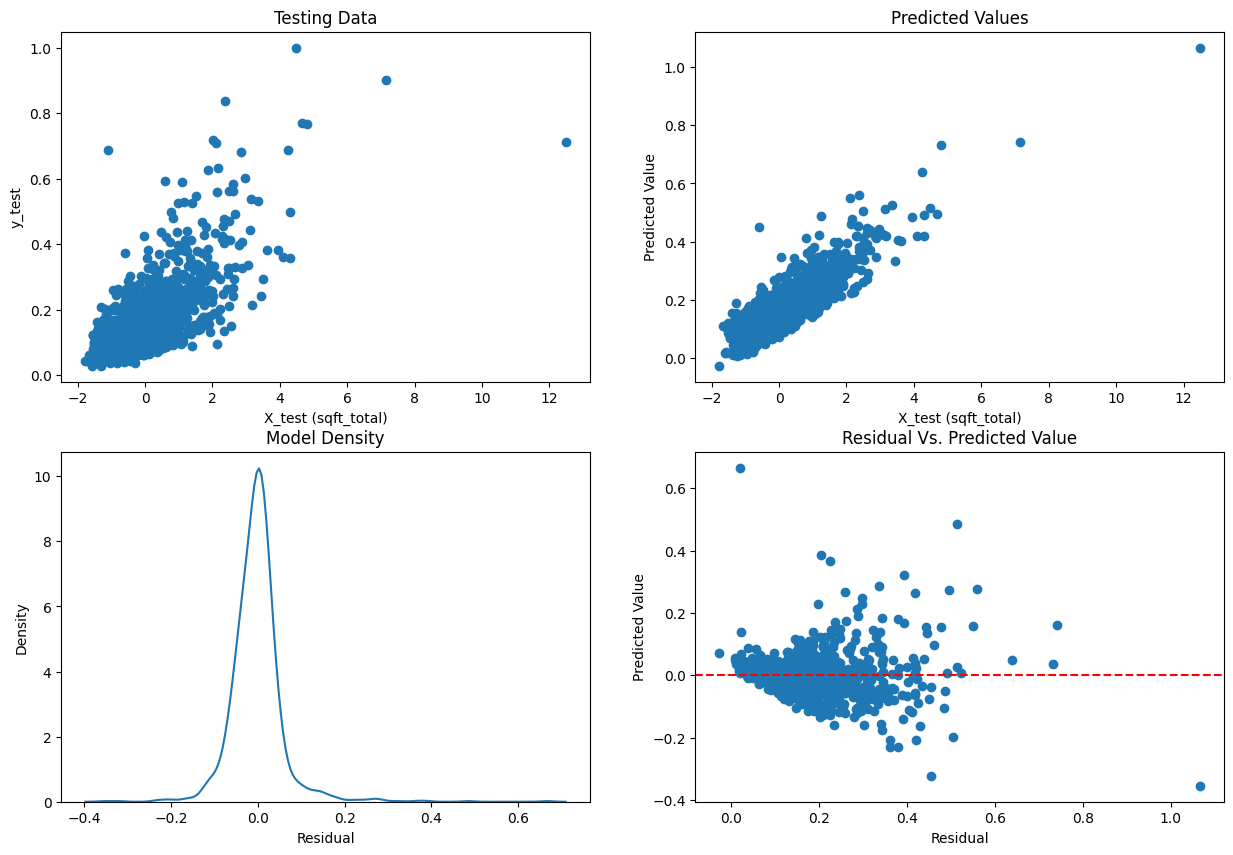

In [130]:
costFResidual = y_test - y_pred
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('Testing Data')
plt.xlabel('X_test (sqft_total)')
plt.ylabel('y_test')
plt.scatter(X_test[:, 9], y_test)

plt.subplot(2,2,2)
plt.title('Predicted Values')
plt.xlabel('X_test (sqft_total)')
plt.ylabel('Predicted Value')
plt.scatter(X_test[:, 9], y_pred)

plt.subplot(2,2,3)
plt.title('Model Density')
plt.xlabel('Residual')
sns.kdeplot(costFResidual)

plt.subplot(2,2,4)
plt.title('Residual Vs. Predicted Value')
plt.xlabel('Residual')
plt.ylabel('Predicted Value')
plt.scatter(x=y_pred, y=costFResidual)
plt.axhline(y=0, color='r', linestyle='--')
